In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

### Acknowlegment:

This following series of notebooks use directly the datasets and logic provided by Johannes Mauritzen on his github page (https://jmaurit.github.io/). I follow his methods closely. The series of lectures, which inspired my notebooks use the R language, so I instead adapted his methodology into Python myself. This acknolegments page applies to all subsequent notebooks on this repository. The choice of `.ipynb` felt more natural and easier than an Object Oriented approach, as the latter is not necessary here. 

## Introduction to Oil and Gas data

Importing data on petroleum in the Norwegian Continental Shelf

In [59]:
oil_fields = pd.read_csv("oil_fields_cross.csv")

In [60]:
oil_fields['producing_from'] = pd.to_datetime(oil_fields['producing_from'])

In [61]:
oil_fields.columns

Index(['Unnamed: 0', 'name', 'lon', 'lat', 'recoverable_oil', 'remaining_oil',
       'producing_from', 'total.invest'],
      dtype='object')

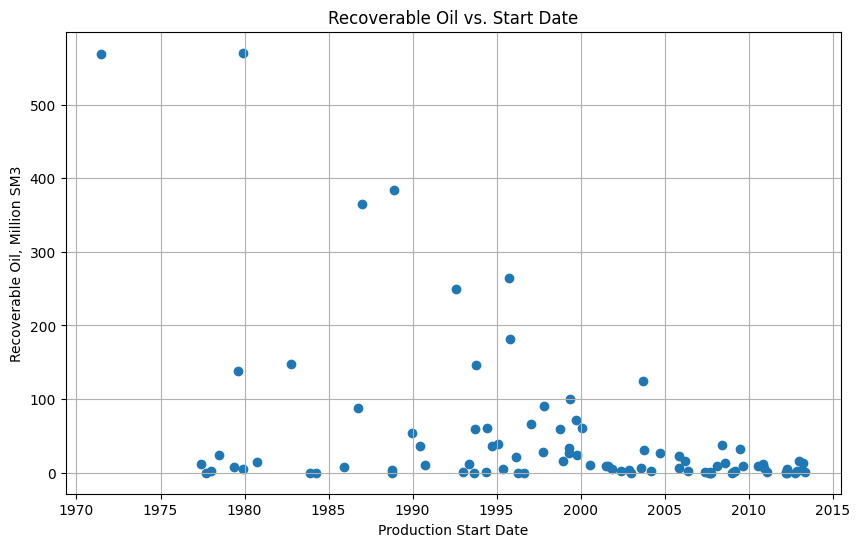

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(oil_fields['producing_from'], oil_fields['recoverable_oil'])
plt.xlabel('Production Start Date')
plt.ylabel('Recoverable Oil, Million SM3')
plt.title('Recoverable Oil vs. Start Date')
plt.grid(True)
plt.show()

SM3 stands for standard cubic metre at 15 degrees celsius, under normal atmospheric pressure

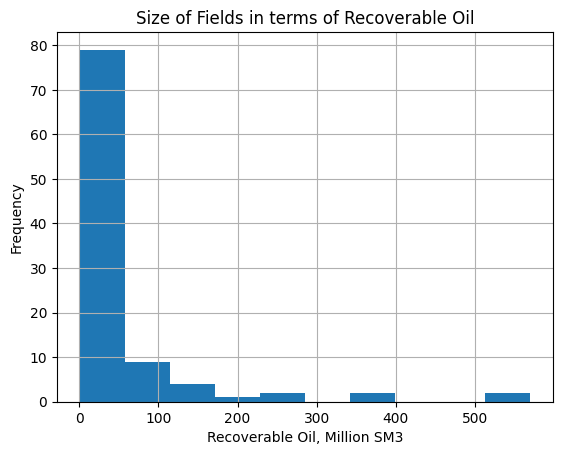

In [63]:
plt.hist(oil_fields['recoverable_oil'])
plt.ylabel('Frequency')
plt.xlabel('Recoverable Oil, Million SM3')
plt.title('Size of Fields in terms of Recoverable Oil')
plt.grid(True)
plt.show()

Most fields tend to be small, but there is a 'fat tail' here. The ouliers seen here are the fields *Stratfjord* and *Ekofisk* fields, which were the first two discovered fields.

New variable *extracted* is created, which is the difference between the total recoverable oil and the remaining oil in the field

In [64]:
oil_fields['extracted'] = oil_fields['recoverable_oil'] - oil_fields['remaining_oil']

The investment per extracted SM3 of oil is calculated

In [65]:
oil_fields['invest_per_millsm3'] = oil_fields['total.invest'] / oil_fields['extracted']

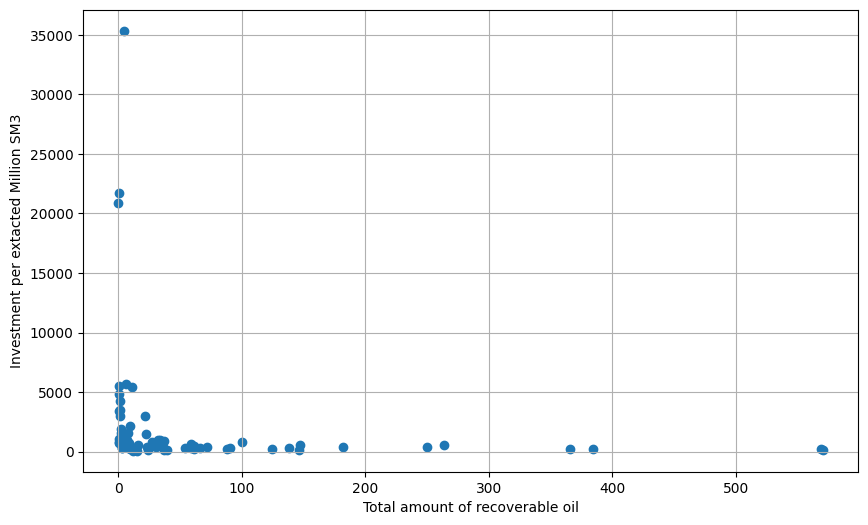

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(oil_fields['recoverable_oil'], oil_fields['invest_per_millsm3'])
plt.xlabel('Total amount of recoverable oil')
plt.ylabel('Investment per extacted Million SM3')
plt.grid(True)
plt.show()

We see that the more recoverable oil a field has had, the cheaper it has been to extract the oil (measured in $/ SM3 of oil extracted)

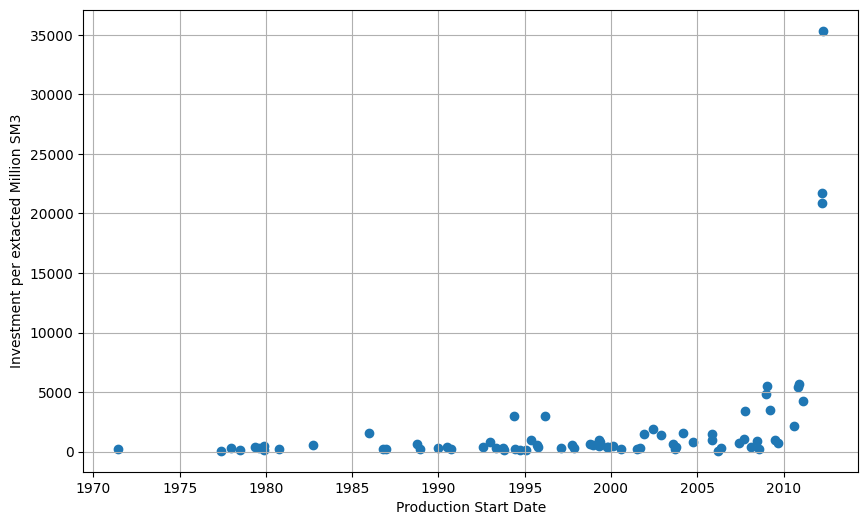

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(oil_fields['producing_from'], oil_fields['invest_per_millsm3'])
plt.xlabel('Production Start Date')
plt.ylabel('Investment per extacted Million SM3')
plt.grid(True)
plt.show()

We see that the later the production of the oil field has taken place, the more expensive the extraction has been (measured in $/SM3 of extracted oil)

instead try a semi-log plot 

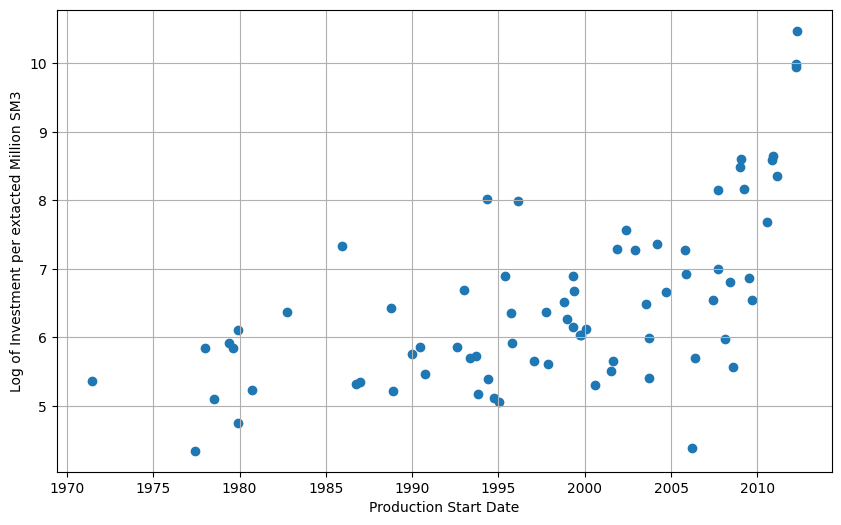

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(oil_fields['producing_from'], np.log(oil_fields['invest_per_millsm3']))
plt.xlabel('Production Start Date')
plt.ylabel('Log of Investment per extacted Million SM3')
plt.grid(True)
plt.show()

The slope of the line can be interepreted as rate of growth (rate of increase in investment per extracted million SM3 as a function of production start date)

Most of the investments into a field are front-loaded. Most of the investment per extracted million SM3 lies in the initial build-out of the field and related infrastructure. The running costs once the field is up-and-running are relatively low. Costs per extracted oil volume unit are much higher for newer fields, and they will fall fast as production takes place over time.

### Tax Regime in Norwegian oil and gas industry

The marginal taxation rate on profits from oil and gas are very high (22% corporation tax + 56% resource tax, environmental fees, auction etc.). Losses can be carried forward to subsequent years, only the net profit is taxable, comapnies can apply for a refund of the tax value of exploration costs. 

1.  The special tax treatment allows companies to deduct all of their investment costs immediately in the year the investment is made for the special tax base. This immediate expensing reduces the taxable income, lowering the financial burden at the beginning of the project. These provisions enhance cash flow during the capital-intensive startup phase, making it more financially feasible for companies to undertake substantial offshore investments.
2. The Norwegian government therefore shoulders a big portion of the upfront investment costs through its tax policies. This encourages investment in the petroleum sector. This exposes the Norwegian government to financial risk if the project is unsuccessful or oil prices dip. 
3. Tax neutrality assumes that investments are economically viable over their expected lifespans. The current tax system may no longer be neutral if there is a high risk that oil and gas production will become unprofitable or restricted due to regulations. For example, companies may proceed with projects that are not truly viable in the long term, relying on favourable tax treatments to offset potential future losses. This would be a misallocation of resources. The state could also face increased financial liabilities. 
\end{itemize}

### Large Oil and Gas Fields

Those that have more than 50 million SM3 of recoverable oil

In [67]:
big_oil_fields = oil_fields[oil_fields['recoverable_oil'] > 50]

In [68]:
big_oil_fields.sort_values(by='recoverable_oil', ascending=False).reset_index()

,index,Unnamed: 0,name,lon,lat,recoverable_oil,remaining_oil,producing_from,total.invest,extracted,invest_per_millsm3
0,71,1220,STATFJORD,1.866338,61.262224,570.4,4.3,1979-11-24,65264,566.1,115.287052
1,14,257,EKOFISK,3.218287,56.546632,569.2,129.8,1971-06-15,94172,439.4,214.319527
2,56,971,OSEBERG,2.722425,60.547856,384.6,22.7,1988-12-01,66622,361.9,184.089527
3,29,524,GULLFAKS,2.130364,61.208958,365.5,11.6,1986-12-22,74940,353.9,211.754733
4,80,1432,TROLL,3.552057,60.822933,263.8,36.0,1995-09-19,130620,227.8,573.397717
5,70,1194,SNORRE,2.193464,61.492581,249.9,64.1,1992-08-03,65475,185.8,352.395048
6,33,620,HEIDRUN,7.306980,65.329444,182.1,40.1,1995-10-18,52935,142.0,372.781690
7,88,1553,VALHALL,3.393803,56.275769,147.4,41.5,1982-10-02,61511,105.9,580.840415
8,12,190,DRAUGEN,7.756043,64.332434,146.7,14.9,1993-10-19,23291,131.8,176.714719
9,15,301,ELDFISK,3.242870,56.398700,137.9,37.3,1979-08-08,34963,100.6,347.544732


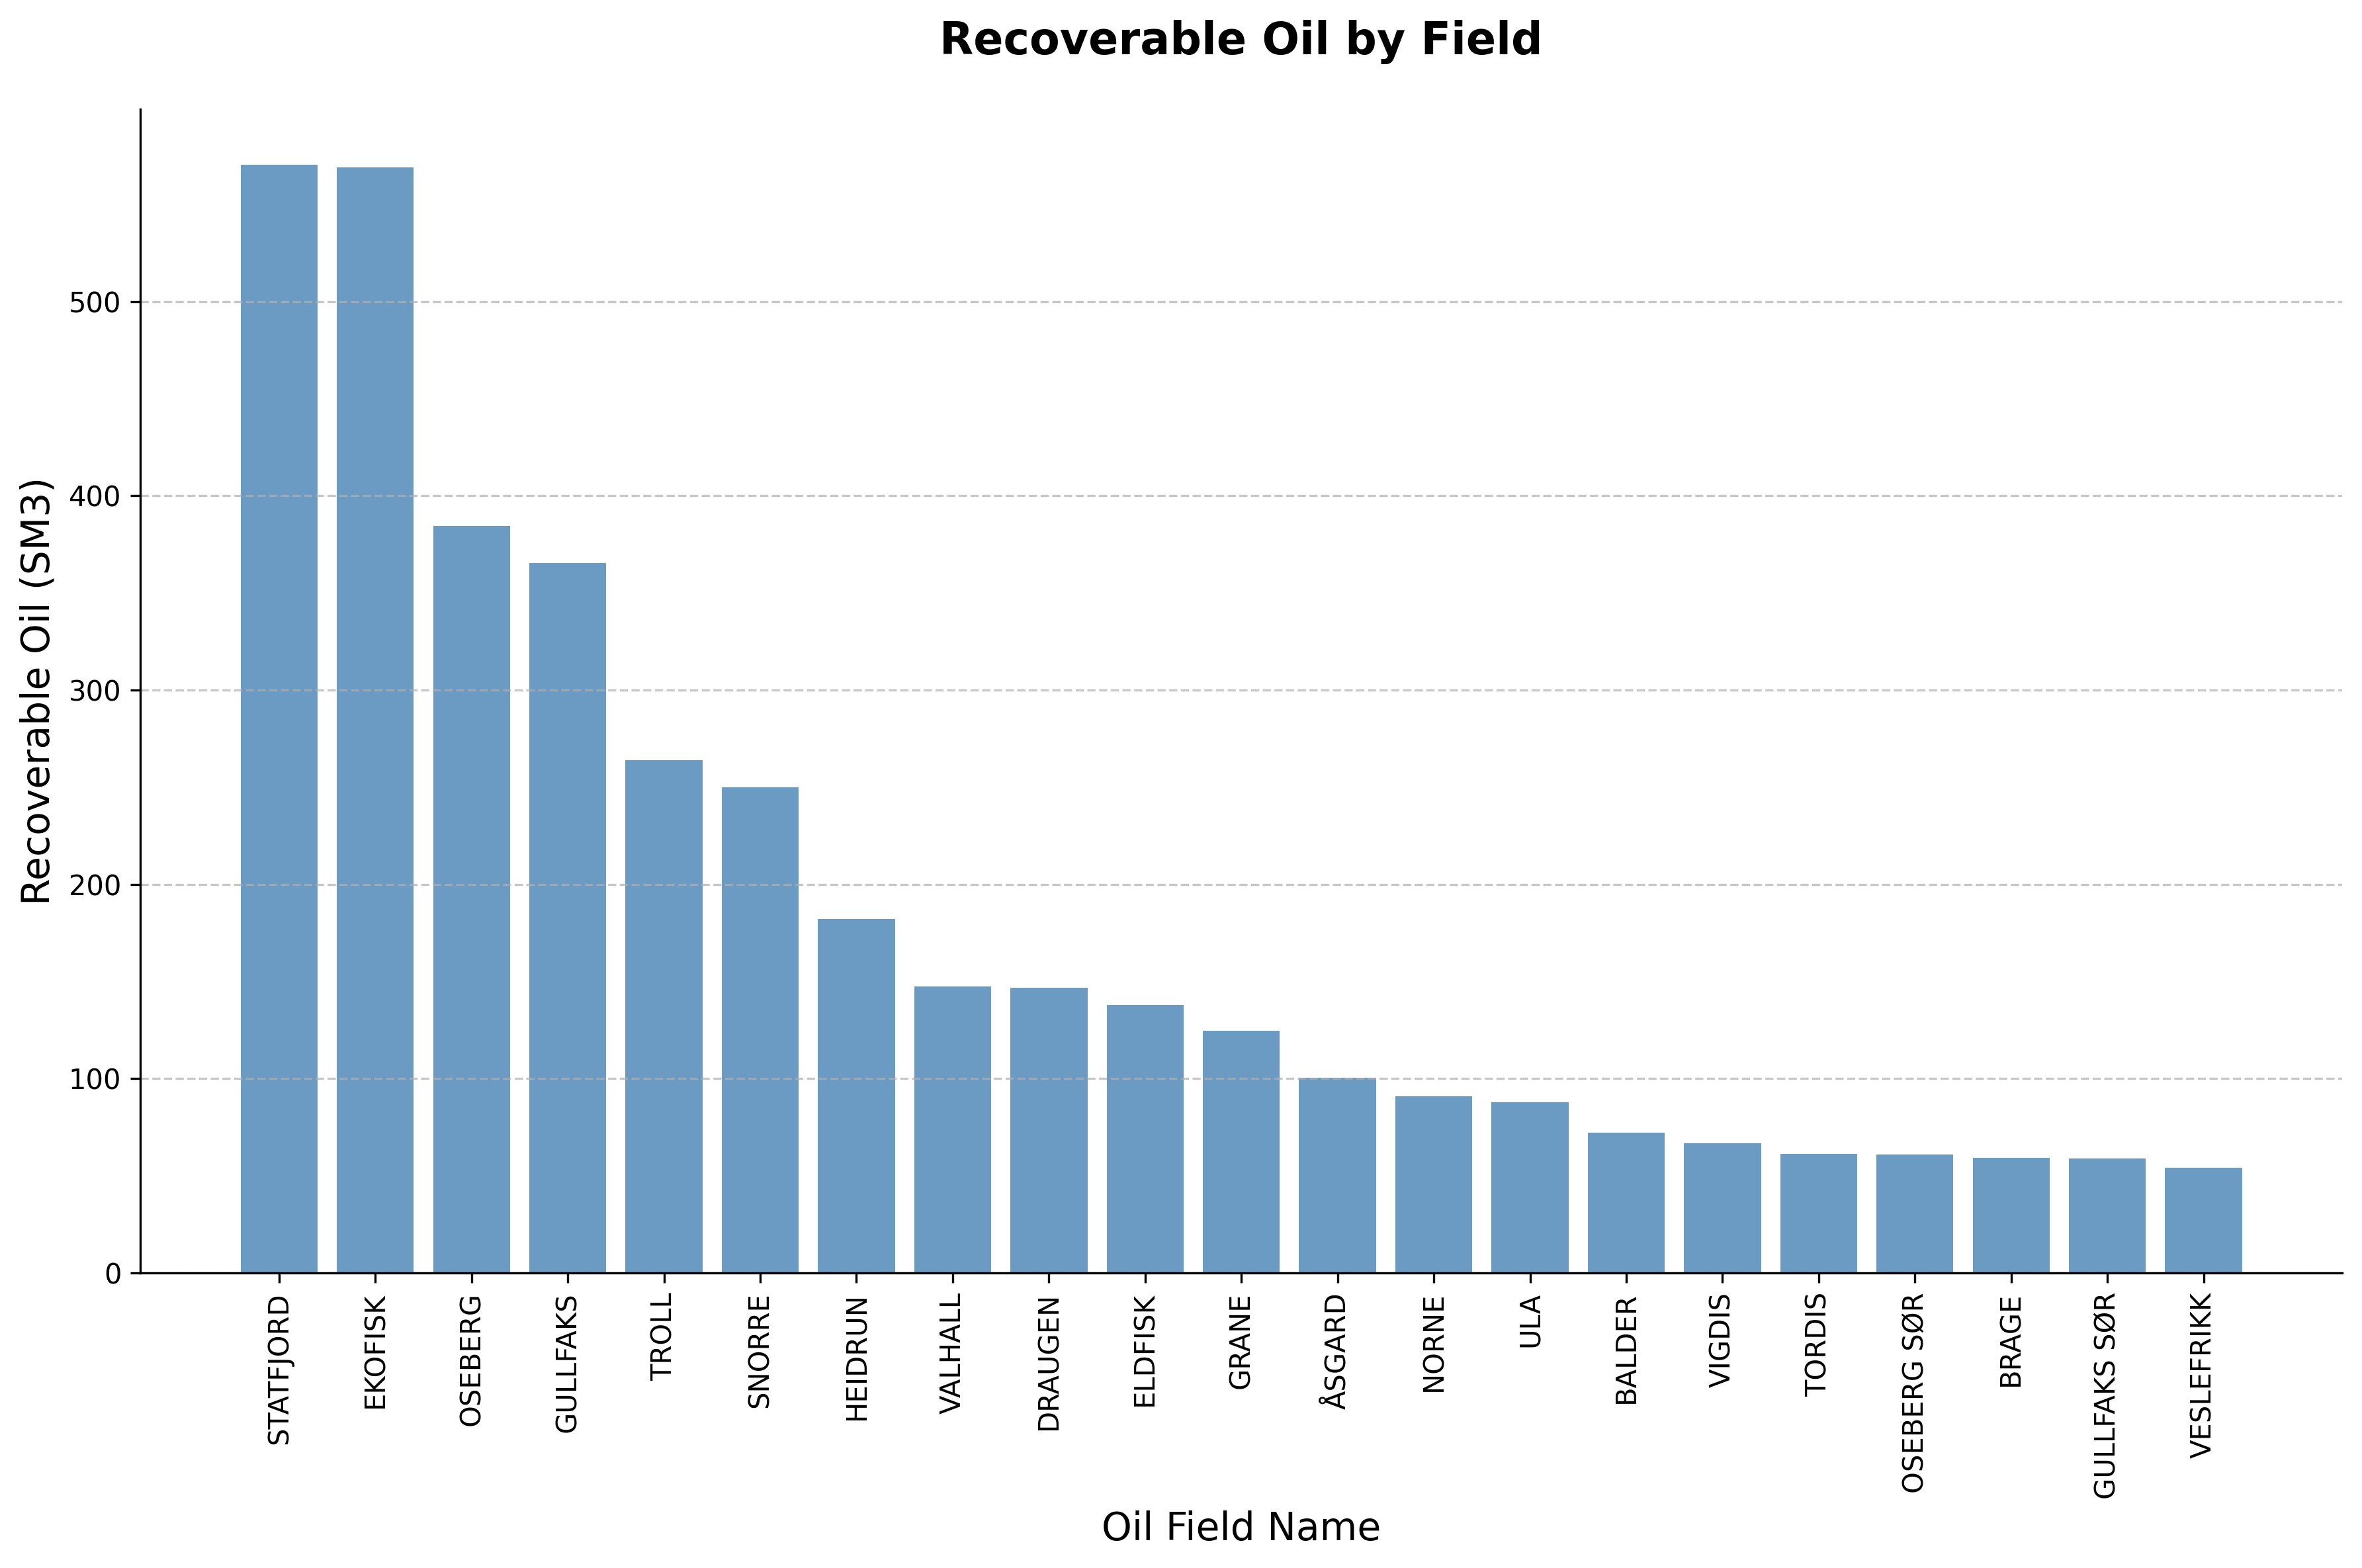

In [69]:
plt.figure(figsize=(12, 8), dpi=300) 
plt.bar(big_oil_fields.sort_values(by='recoverable_oil', ascending=False)['name'], big_oil_fields.sort_values(by='recoverable_oil', ascending=False)['recoverable_oil'], color='steelblue', alpha=0.8)
# Add titles and labels
plt.title('Recoverable Oil by Field', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Oil Field Name', fontsize=14)
plt.ylabel('Recoverable Oil (SM3)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Add horizontal gridlines for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove unnecessary spines for a cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

In [26]:
# Create the scatter geo plot
fig = px.scatter_geo(
    big_oil_fields,
    lat='lat',
    lon='lon',
    size='recoverable_oil',
    color='recoverable_oil',
    hover_name='name',
    projection='natural earth',
    title='Oil Fields in the North Sea'
)

# Customize the appearance
fig.update_geos(
    showcountries=True,
    lataxis_showgrid=True,
    lonaxis_showgrid=True
)

# Show the plot
fig.show()


- A variable for *investment per million sm3 in recoverable oil (recoverable_oil)* is created and plotted against the *producing_from* variable and the original *recoverable_oil* variable. The results are interpreted below.

In [70]:
oil_fields["invest_per_rec"] = oil_fields['total.invest'] / oil_fields['recoverable_oil']

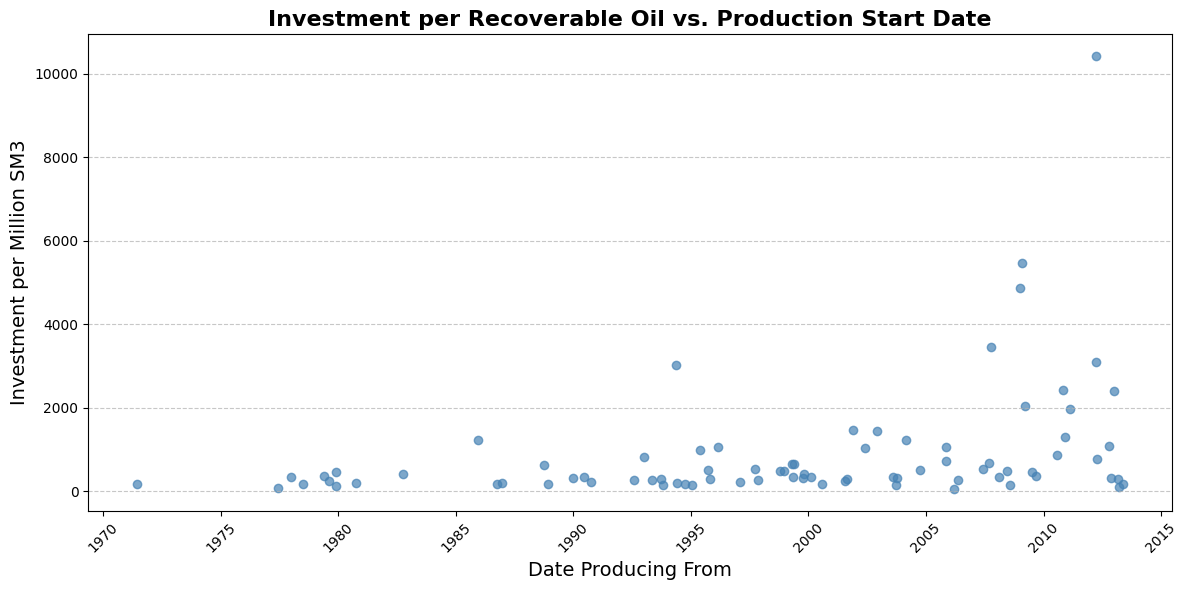

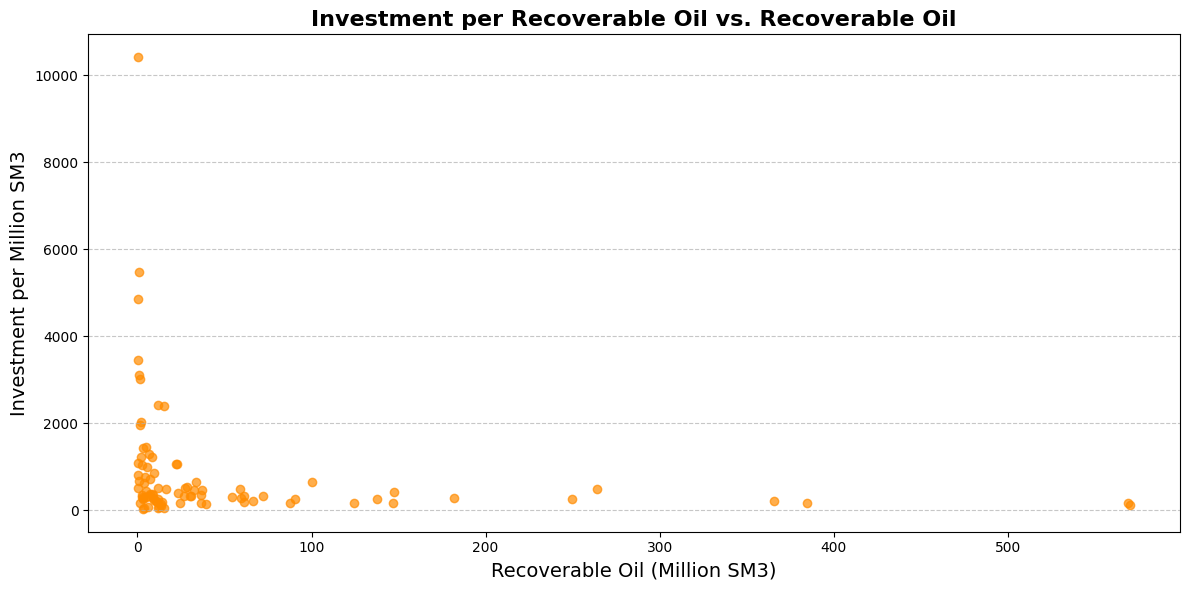

In [71]:
# Plot 1: invest_per_rec vs. producing_from
plt.figure(figsize=(12, 6))
plt.scatter(oil_fields['producing_from'], oil_fields['invest_per_rec'], color='steelblue', alpha=0.7)
plt.title('Investment per Recoverable Oil vs. Production Start Date', fontsize=16, fontweight='bold')
plt.xlabel('Date Producing From', fontsize=14)
plt.ylabel('Investment per Million SM3', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: invest_per_rec vs. recoverable_oil
plt.figure(figsize=(12, 6))
plt.scatter(oil_fields['recoverable_oil'], oil_fields['invest_per_rec'], color='darkorange', alpha=0.7)
plt.title('Investment per Recoverable Oil vs. Recoverable Oil', fontsize=16, fontweight='bold')
plt.xlabel('Recoverable Oil (Million SM3)', fontsize=14)
plt.ylabel('Investment per Million SM3', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Costs have increased over time.

Larger fields appear to have economies of scale and are thus cheaper per SM3.

- List of 5 cheapest oil fields (lowest investment per recoverable oil) and commenting on what they appear to have in common with one another

In [72]:
oil_fields.sort_values(by='invest_per_rec')[:5]

,Unnamed: 0,name,lon,lat,recoverable_oil,remaining_oil,producing_from,total.invest,extracted,invest_per_millsm3,invest_per_rec
8,118,BØYLA,1.848627,59.320327,3.4,3.4,NaT,85,0.0,inf,25.000000
41,752,KNARR,2.781421,61.801142,11.9,11.9,NaT,534,0.0,inf,44.873950
62,1081,RINGHORNE ØST,2.494802,59.290829,15.5,6.3,2006-03-19,738,9.2,80.217391,47.612903
10,146,BRYNHILD,2.297317,57.493298,3.6,3.6,NaT,210,0.0,inf,58.333333
45,802,MARTIN LINGE,2.054545,60.508237,6.0,6.0,NaT,402,0.0,inf,67.000000


It appears as though the remaining oil in these fields is, in most cases, equal to the total recoverable oil, implying that these fields were not producing at the moment of the data collection. This prevents us from calculating the investment per million SM3 of extracted (none has been extracted for 4 of the 5 cheapest fields). 

We can conclude that these 5 fields are likely the "cheapest" because very little investment has taken place thus far (no extraction). This may imply that all investment up to this point in time was just for the exploration phase.

These oil fields should be removed, an analysis of the 10 cheapest oil fields could therefore be appropriate. 

In [73]:
oil_fields.sort_values(by='invest_per_rec')[:10]

,Unnamed: 0,name,lon,lat,recoverable_oil,remaining_oil,producing_from,total.invest,extracted,invest_per_millsm3,invest_per_rec
8,118,BØYLA,1.848627,59.320327,3.4,3.4,NaT,85,0.0,inf,25.000000
41,752,KNARR,2.781421,61.801142,11.9,11.9,NaT,534,0.0,inf,44.873950
62,1081,RINGHORNE ØST,2.494802,59.290829,15.5,6.3,2006-03-19,738,9.2,80.217391,47.612903
10,146,BRYNHILD,2.297317,57.493298,3.6,3.6,NaT,210,0.0,inf,58.333333
45,802,MARTIN LINGE,2.054545,60.508237,6.0,6.0,NaT,402,0.0,inf,67.000000
92,1643,VEST EKOFISK,3.085798,56.562620,12.2,0.0,1977-05-31,943,12.2,77.295082,77.295082
66,1129,SKULD,8.314253,66.233749,13.4,13.4,2013-03-19,1434,0.0,inf,107.014925
71,1220,STATFJORD,1.866338,61.262224,570.4,4.3,1979-11-24,65264,566.1,115.287052,114.417952
94,1704,VILJE,2.275522,59.663423,13.6,6.2,2008-08-01,1947,7.4,263.108108,143.161765
72,1260,STATFJORD NORD,1.940215,61.444570,39.5,3.0,1995-01-23,5719,36.5,156.684932,144.784810


No other rows `producing_from` contain `NaN` values

In [74]:
oil_fields[oil_fields['producing_from'].isna()]

,Unnamed: 0,name,lon,lat,recoverable_oil,remaining_oil,producing_from,total.invest,extracted,invest_per_millsm3,invest_per_rec
0,1,33/9-6 DELTA,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN
8,118,BØYLA,1.848627,59.320327,3.4,3.4,NaT,85,0.0,inf,25.000000
10,146,BRYNHILD,2.297317,57.493298,3.6,3.6,NaT,210,0.0,inf,58.333333
23,464,GINA KROG,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN
26,499,GOLIAT,22.296546,71.274064,30.2,30.2,NaT,10182,0.0,inf,337.152318
28,520,GUDRUN,1.751611,58.849380,11.7,11.7,NaT,5857,0.0,inf,500.598291
41,752,KNARR,2.781421,61.801142,11.9,11.9,NaT,534,0.0,inf,44.873950
45,802,MARTIN LINGE,2.054545,60.508237,6.0,6.0,NaT,402,0.0,inf,67.000000
87,1549,VALEMON,2.355820,61.042578,4.9,4.9,NaT,1484,0.0,inf,302.857143


In [75]:
oil_fields = oil_fields.dropna(subset=["producing_from"])
oil_fields = oil_fields.dropna(subset=['lat'])

- Following hypothesis is presented: oil fields farther north are more expensive to exploit. The hypothesis is explored and analyse whether it has merit.

Visualise the latitude data points (which indicate how far north the fields are)

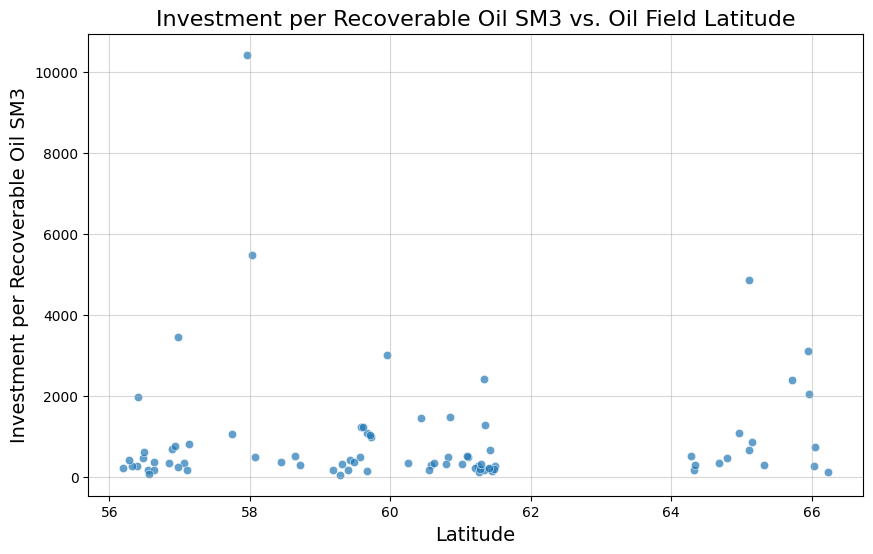

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='invest_per_rec', data=oil_fields, alpha=0.7)
plt.title('Investment per Recoverable Oil SM3 vs. Oil Field Latitude', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Investment per Recoverable Oil SM3', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

There is no clear pattern in this plot. Use a regression instead

Correlation analysis

In [77]:
correlation = oil_fields[['lat', 'invest_per_rec']].corr()
print(correlation)

                     lat  invest_per_rec
lat             1.000000        0.021307
invest_per_rec  0.021307        1.000000


Very weak positive correlation

Linear regression

In [81]:
# replace infinity by nan
oil_fields['invest_per_rec'] = oil_fields['invest_per_rec'].replace(np.inf, np.nan)
oil_fields = oil_fields.dropna(subset=['invest_per_rec']).reset_index(drop=True)
print(oil_fields)

    Unnamed: 0        name       lon        lat  recoverable_oil  \
0            6  ALBUSKJELL  2.993019  56.630789              7.4   
1           46        ALVE  7.827906  65.969240              1.9   
2           54     ALVHEIM  2.010224  59.574650             37.2   
3           64      ÅSGARD  6.728537  65.116354            100.4   
4           82        ATLA  2.577873  59.670574              0.3   
..         ...         ...       ...        ...              ...   
76        1732  VISUND SØR  2.345196  61.296759              2.7   
77        1735      VOLUND  1.946607  59.484106              8.6   
78        1745       VOLVE  1.890830  58.439047              8.7   
79        1754         YME  4.362773  57.748852             22.0   
80        1796  YTTERGRYTA  7.515016  65.110591              0.3   

    remaining_oil producing_from  total.invest  extracted  invest_per_millsm3  \
0             0.0     1979-05-26          2752        7.4          371.891892   
1             0.8    

10 values of investment per recoverable oil SM3 has an infinite value, which results from dividing by zero recoverable oil in oil fields. Remove these values.

In [82]:
X = oil_fields['lat']
y = oil_fields['invest_per_rec']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         invest_per_rec   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.03588
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.850
Time:                        23:39:38   Log-Likelihood:                -705.04
No. Observations:                  81   AIC:                             1414.
Df Residuals:                      79   BIC:                             1419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.9617   3353.817      0.075      0.9

R-squared value of 0 means that latitude explains none of the variability in the investment per recoverable SM3 of oil. 

The coefficient of `lat` (investment per recoverable oil SM3 is expected to increase by 10 units) is not statistically significant.

P-value of 0.850 is above the significance threshold (e.g. 0.05), indicating we fail to reject the null hypothesis. There is no evidence that latitude has a significant impact on investment per recoverable oil SM3. 

Collinearity number is high, indicating potential multicollinearity or numerical instability. 

Try multivariate regression analysis using other variables

In [83]:
# Select predictors and dependent variable
X = oil_fields[['lat', 'recoverable_oil', 'producing_from']]  # Independent variables
y = oil_fields['invest_per_rec']  # Dependent variable

# Handle categorical variables (e.g., producing_from as a date)
X['producing_from'] = pd.to_datetime(X['producing_from']).dt.year
X = sm.add_constant(X)  # Add constant for intercept

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         invest_per_rec   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     4.158
Date:                Tue, 10 Dec 2024   Prob (F-statistic):            0.00875
Time:                        23:45:19   Log-Likelihood:                -698.98
No. Observations:                  81   AIC:                             1406.
Df Residuals:                      77   BIC:                             1416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.036e+05   3.58e+04     

/var/folders/g2/l186zykd1g56mc9vp1p2rv280000gn/T/ipykernel_21425/1039491009.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Improved R-squared of 0.139 indicating that variation in investment per recoverable oil is explained by the model 

F-statistic = 4.158 with p-value of 0.00875, meaning it is statistically significant at 1% level, at least one predictor contributes to explaining the variability in investment

Production Start Year (`producing_from`) is statistically significant. For every additional year later that a field begins production, the investment per recoverable oil increases by about 54.35 units. 

- Find the average depths of the offshore oil fields, number of wells and do some kind of linear regression to find the relationship 